<a href="https://colab.research.google.com/github/Vishwajeet111/Classification-of-Leaves-disease/blob/master/Trial_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_size = 256
channels = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/leaves_image2/train',
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse"
)

Found 21472 images belonging to 19 classes.


In [22]:
len(train_generator)

671

In [47]:
# train_count = []
# i = 0
# while i in range(len(train_generator)):
#   image_label, label_batch = next(train_generator)
#   print(i)
#   train_count.extend(list(label_batch))
#   i+= 1

In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/leaves_image2/test',
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse",
    shuffle = False
)

Found 2700 images belonging to 19 classes.


In [ ]:
test_count = []
i = 0
while i in range(len(test_generator)):
  image_label, label_batch = next(test_generator)
  print(i)
  test_count.extend(list(label_batch))
  i+= 1
test_count = list(map(int, test_count))
res = dict.fromkeys(set(test_count), 0)
print(res)
for i in test_count:
  if i in res.keys():
    res[i] += 1

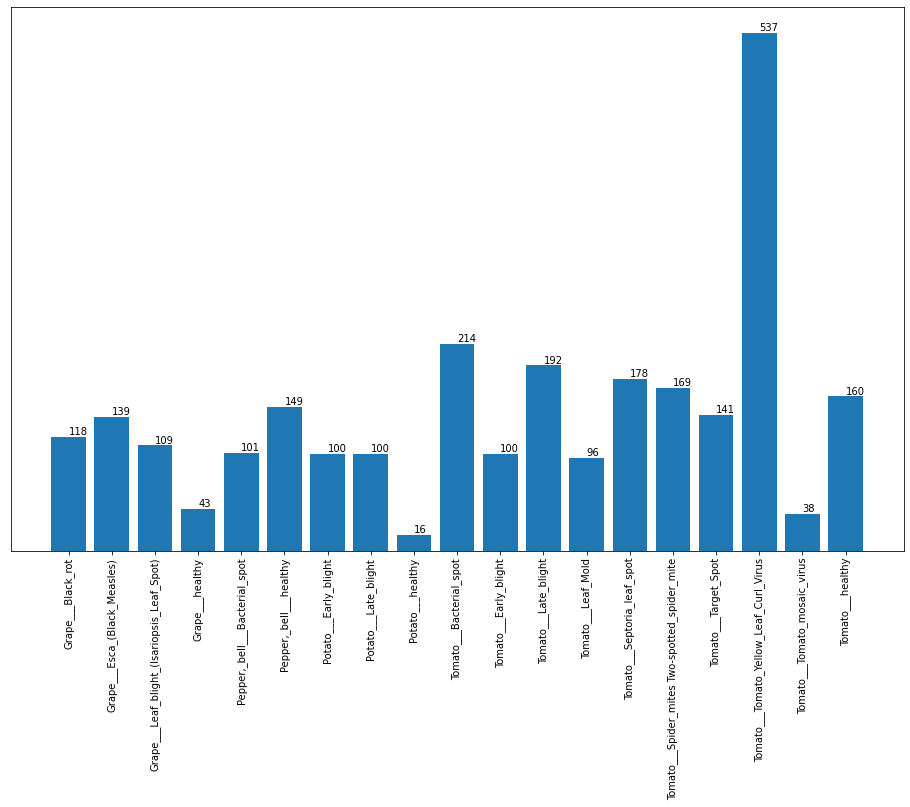

In [43]:
plt.rcParams['figure.figsize'] = (16,10)
barplot = plt.bar(x=class_names,height=res.values())
plt.xticks(rotation=90)
plt.yticks([])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

In [45]:
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
val_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/leaves_image2/val",
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse",
)

Found 2678 images belonging to 19 classes.


In [ ]:
val_count = []
i = 0
while i in range(len(val_generator)):
  image_label, label_batch = next(val_generator)
  print(i)
  val_count.extend(list(label_batch))
  i+= 1
val_count = list(map(int, val_count))
res1 = dict.fromkeys(set(val_count), 0)
print(res1)
for i in val_count:
  if i in res1.keys():
    res1[i] += 1

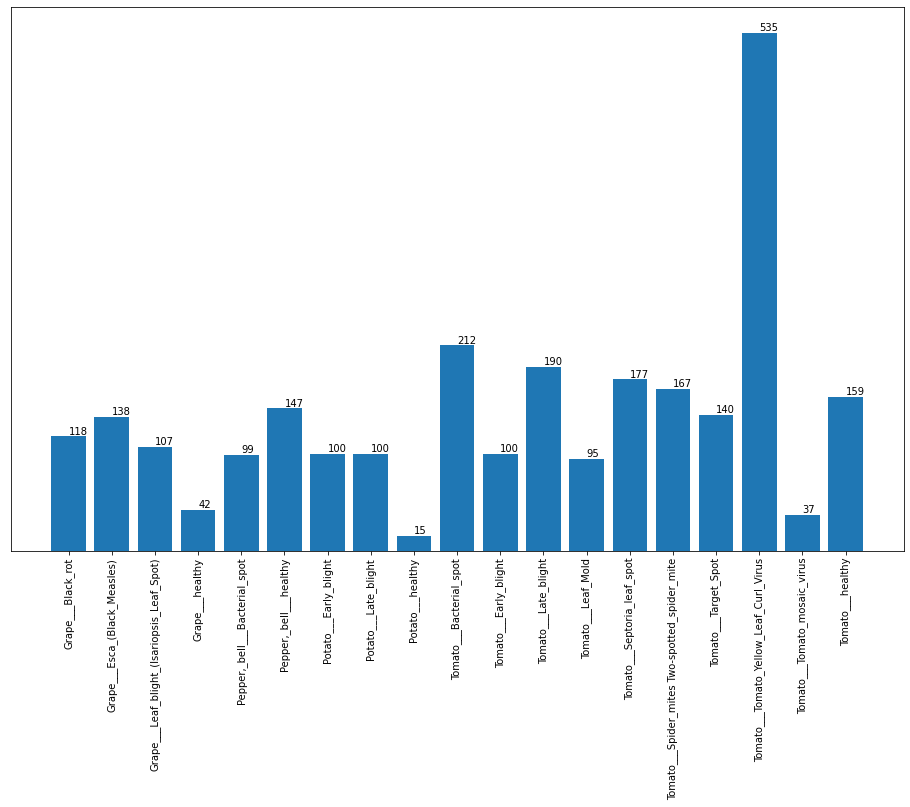

In [49]:
barplot = plt.bar(x=class_names,height=res1.values())
plt.xticks(rotation=90)
plt.yticks([])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

In [ ]:
input_shape = (image_size,image_size,channels)
n_classes = 19
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,steps_per_epoch=50,
    batch_size=32,validation_data=val_generator,
    validation_steps=6,verbose=1,epochs=50,)

Epoch 1/50
50/50 [==============================] - 401s 8s/step - loss: 2.4232 - accuracy: 0.2525 - val_loss: 2.0816 - val_accuracy: 0.2812
Epoch 2/50
50/50 [==============================] - 402s 8s/step - loss: 1.7926 - accuracy: 0.4081 - val_loss: 1.6903 - val_accuracy: 0.4323
Epoch 3/50
50/50 [==============================] - 346s 7s/step - loss: 1.6006 - accuracy: 0.4875 - val_loss: 1.5916 - val_accuracy: 0.4896
Epoch 4/50
50/50 [==============================] - 310s 6s/step - loss: 1.3266 - accuracy: 0.5519 - val_loss: 1.1786 - val_accuracy: 0.5833
Epoch 5/50
50/50 [==============================] - 292s 6s/step - loss: 1.1503 - accuracy: 0.6306 - val_loss: 1.0558 - val_accuracy: 0.6250
Epoch 6/50
50/50 [==============================] - 275s 6s/step - loss: 1.0839 - accuracy: 0.6394 - val_loss: 1.3398 - val_accuracy: 0.6458
Epoch 7/50
50/50 [==============================] - 245s 5s/step - loss: 1.0371 - accuracy: 0.6463 - val_loss: 1.1375 - val_accuracy: 0.6094
Epoch 8/50
50

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

85/85 [==============================] - 618s 7s/step - loss: 0.2612 - accuracy: 0.9096


In [ ]:
print('The accuracy is {}'.format(test_accuracy * 100))

The accuracy is 90.96296429634094


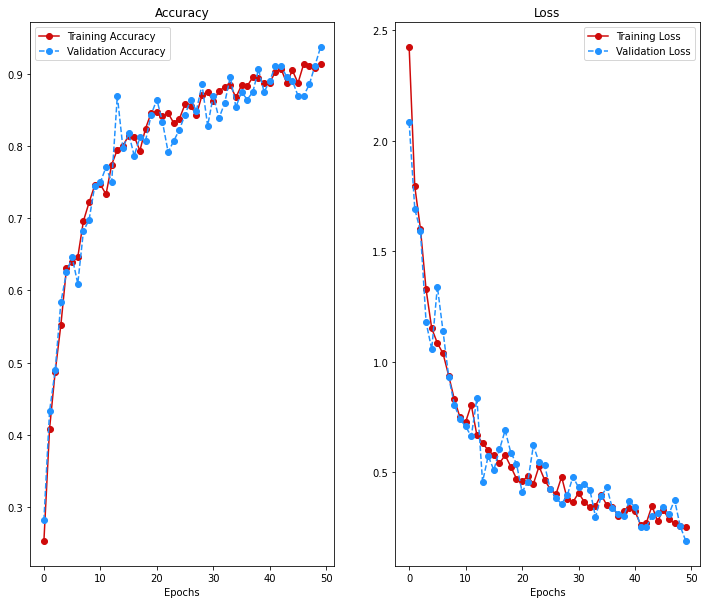

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.rcParams['figure.figsize'] = (12,10)
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy,'-o', label='Training Accuracy',color="#CF0A0A")
plt.plot(epochs_range, val_accuracy,'o--', label='Validation Accuracy',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss,'-o', label='Training Loss',color="#CF0A0A")
plt.plot(epochs_range, val_loss,'o--', label='Validation Loss',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Loss')
plt.show();

In [ ]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
y_pred = model.predict(test_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)

85/85 [==============================] - 39s 456ms/step


Text(86.09374999999999, 0.5, 'Predicted Values')

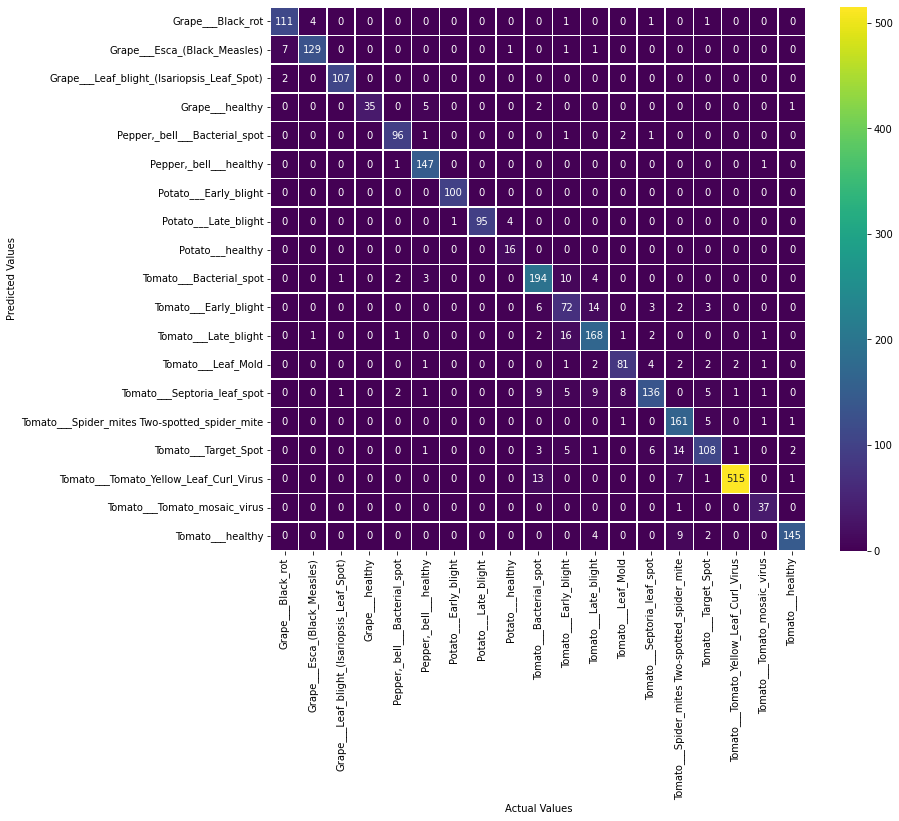

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm,annot=True,cmap="viridis",fmt='g',linewidth=.5,xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [ ]:
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

                                               precision    recall  f1-score   support

                            Grape___Black_rot       0.93      0.94      0.93       118
                 Grape___Esca_(Black_Measles)       0.96      0.93      0.95       139
   Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.98      0.98      0.98       109
                              Grape___healthy       1.00      0.81      0.90        43
                Pepper,_bell___Bacterial_spot       0.94      0.95      0.95       101
                       Pepper,_bell___healthy       0.92      0.99      0.95       149
                        Potato___Early_blight       0.99      1.00      1.00       100
                         Potato___Late_blight       1.00      0.95      0.97       100
                             Potato___healthy       0.76      1.00      0.86        16
                      Tomato___Bacterial_spot       0.85      0.91      0.88       214
                        Tomato___Early_bli

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


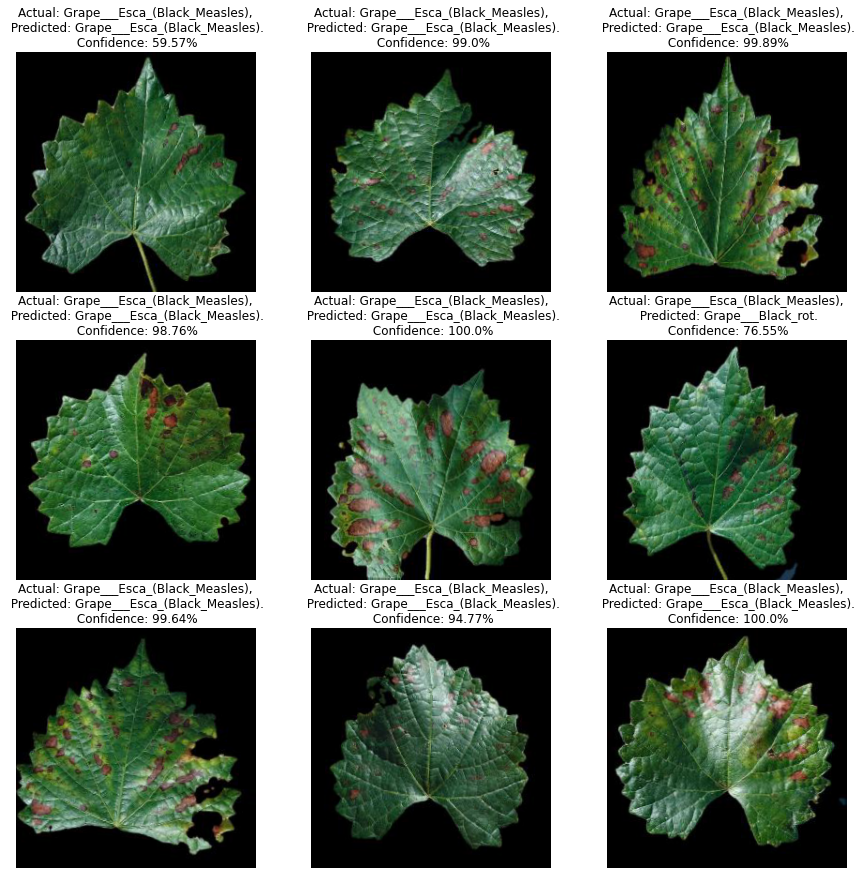

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

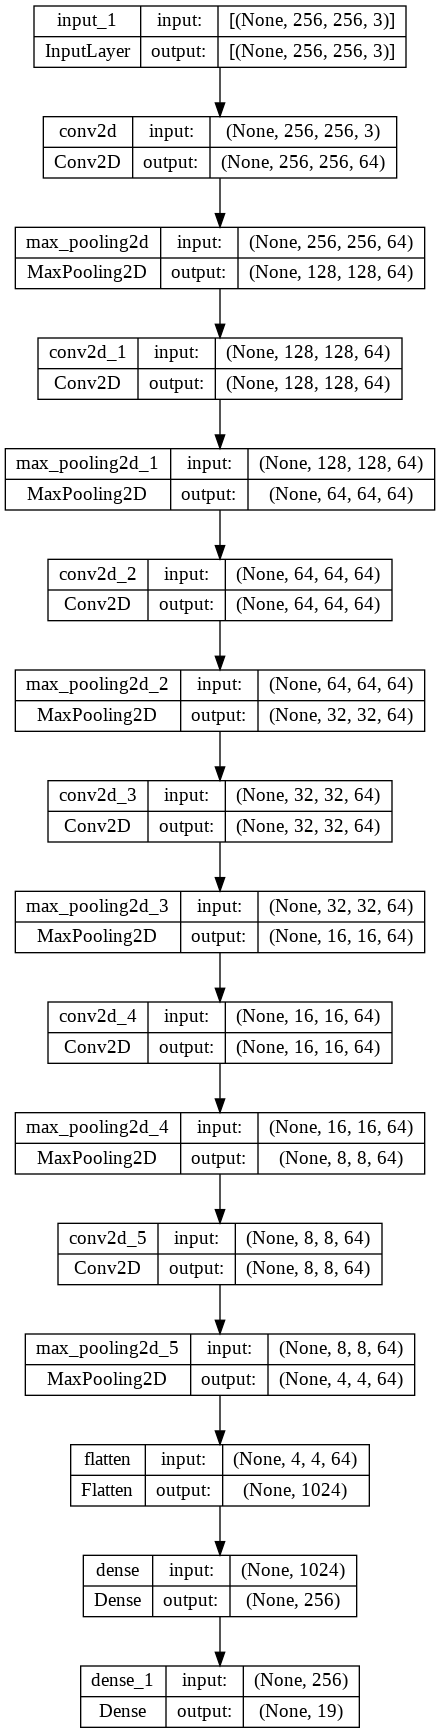

In [ ]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)